In [106]:
import torch
import numpy as np
import torch.optim as optim
import torch.nn.functional as F
torch.manual_seed(0)
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn

In [107]:
df = pd.read_csv("./Churn_Modelling.csv")


In [108]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [109]:
xy = df.to_numpy()
print(xy[:10,:])

[[1 15634602 'Hargrave' 619 'France' 'Female' 42 2 0.0 1 1 1 101348.88 1]
 [2 15647311 'Hill' 608 'Spain' 'Female' 41 1 83807.86 1 0 1 112542.58 0]
 [3 15619304 'Onio' 502 'France' 'Female' 42 8 159660.8 3 1 0 113931.57 1]
 [4 15701354 'Boni' 699 'France' 'Female' 39 1 0.0 2 0 0 93826.63 0]
 [5 15737888 'Mitchell' 850 'Spain' 'Female' 43 2 125510.82 1 1 1 79084.1
  0]
 [6 15574012 'Chu' 645 'Spain' 'Male' 44 8 113755.78 2 1 0 149756.71 1]
 [7 15592531 'Bartlett' 822 'France' 'Male' 50 7 0.0 2 1 1 10062.8 0]
 [8 15656148 'Obinna' 376 'Germany' 'Female' 29 4 115046.74 4 1 0
  119346.88 1]
 [9 15792365 'He' 501 'France' 'Male' 44 4 142051.07 2 0 1 74940.5 0]
 [10 15592389 'H?' 684 'France' 'Male' 27 2 134603.88 1 1 1 71725.73 0]]


In [110]:
data = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
print(data)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   

In [111]:
obj_col = [f for f in data.columns if data[f].dtype == 'object']
print(obj_col)

['Geography', 'Gender']


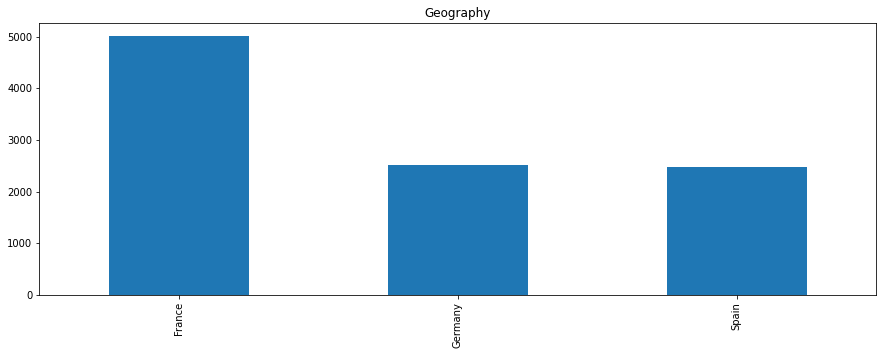

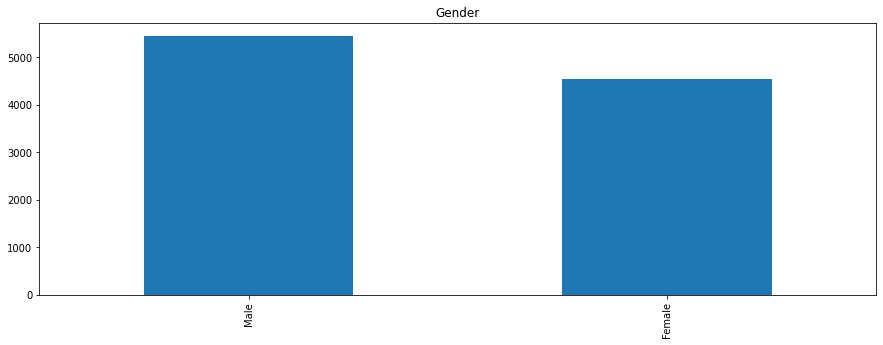

In [112]:
for col in obj_col:
    df[col].value_counts().plot(kind='bar', figsize=[15,5])
    plt.title(col)
    plt.show()

In [113]:
num_col = [f for f in df.columns if df[f].dtype != 'object']
print(num_col)

['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


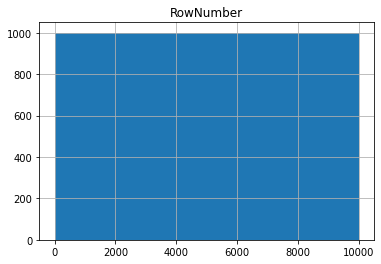

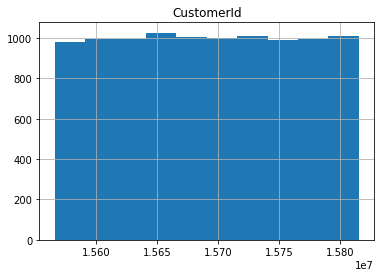

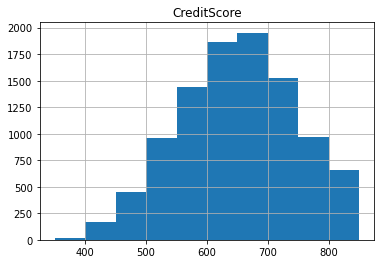

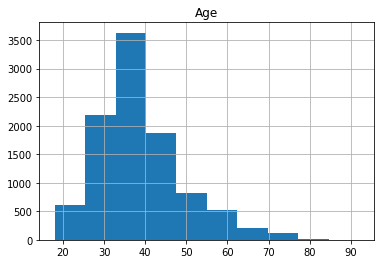

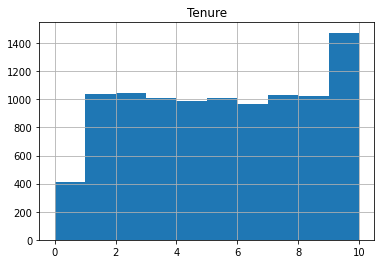

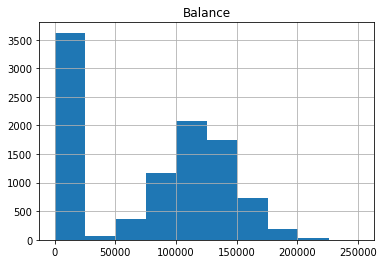

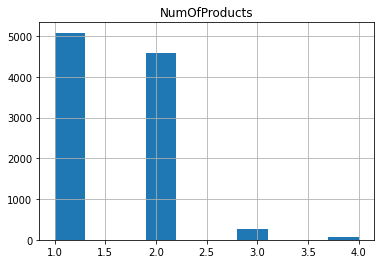

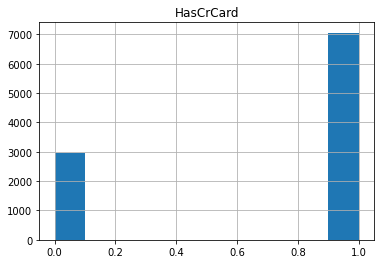

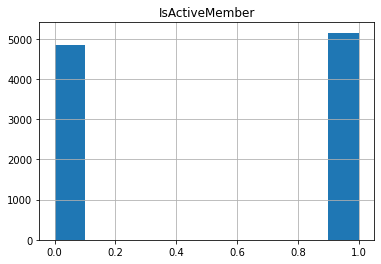

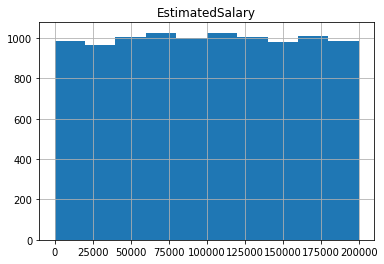

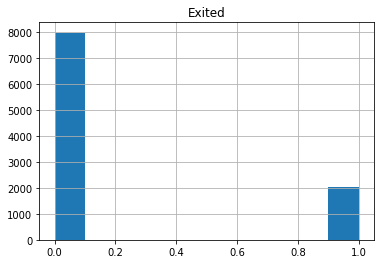

In [114]:
for col in num_col:
    df[col].hist()
    plt.title(col)
    plt.show()

In [115]:
dummy_gender = pd.get_dummies(df[obj_col])
print(dummy_gender)

      Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                    1                  0                0              1   
1                    0                  0                1              1   
2                    1                  0                0              1   
3                    1                  0                0              1   
4                    0                  0                1              1   
...                ...                ...              ...            ...   
9995                 1                  0                0              0   
9996                 1                  0                0              0   
9997                 1                  0                0              1   
9998                 0                  1                0              0   
9999                 1                  0                0              1   

      Gender_Male  
0               0  
1               0  
2              

In [116]:
data = pd.merge(
    left=dummy_gender,
    right=data,
    left_index=True,
    right_index=True,
)
print(data)

      Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                    1                  0                0              1   
1                    0                  0                1              1   
2                    1                  0                0              1   
3                    1                  0                0              1   
4                    0                  0                1              1   
...                ...                ...              ...            ...   
9995                 1                  0                0              0   
9996                 1                  0                0              0   
9997                 1                  0                0              1   
9998                 0                  1                0              0   
9999                 1                  0                0              1   

      Gender_Male  CreditScore Geography  Gender  Age  Tenure    Balance  \

In [117]:
final_data = data.drop(columns=obj_col)
print(final_data)

      Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                    1                  0                0              1   
1                    0                  0                1              1   
2                    1                  0                0              1   
3                    1                  0                0              1   
4                    0                  0                1              1   
...                ...                ...              ...            ...   
9995                 1                  0                0              0   
9996                 1                  0                0              0   
9997                 1                  0                0              1   
9998                 0                  1                0              0   
9999                 1                  0                0              1   

      Gender_Male  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0 

In [118]:
corr = final_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_27620\2934670564.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography_France,1.00,-0.58,-0.58,-0.01,0.01,-0.01,-0.04,-0.00,-0.23,0.00,0.00,0.00,-0.00,-0.10
Geography_Germany,-0.58,1.00,-0.33,0.02,-0.02,0.01,0.05,-0.00,0.40,-0.01,0.01,-0.02,0.01,0.17
Geography_Spain,-0.58,-0.33,1.00,-0.02,0.02,0.00,-0.00,0.00,-0.13,0.01,-0.01,0.02,-0.01,-0.05
Gender_Female,-0.01,0.02,-0.02,1.00,-1.00,0.00,0.03,-0.01,-0.01,0.02,-0.01,-0.02,0.01,0.11
Gender_Male,0.01,-0.02,0.02,-1.00,1.00,-0.00,-0.03,0.01,0.01,-0.02,0.01,0.02,-0.01,-0.11
CreditScore,-0.01,0.01,0.00,0.00,-0.00,1.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
Age,-0.04,0.05,-0.00,0.03,-0.03,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,-0.00,-0.00,0.00,-0.01,0.01,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
Balance,-0.23,0.40,-0.13,-0.01,0.01,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
NumOfProducts,0.00,-0.01,0.01,0.02,-0.02,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05


In [119]:
# As seen from the correlation above, we drop the Gender_male columns
final_data = final_data.drop(columns=['Gender_Male'])
print(final_data)

      Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                    1                  0                0              1   
1                    0                  0                1              1   
2                    1                  0                0              1   
3                    1                  0                0              1   
4                    0                  0                1              1   
...                ...                ...              ...            ...   
9995                 1                  0                0              0   
9996                 1                  0                0              0   
9997                 1                  0                0              1   
9998                 0                  1                0              0   
9999                 1                  0                0              1   

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0   

In [120]:
xy = final_data.to_numpy()
numtrain = int(xy.shape[0]*0.8)

In [121]:
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator)

In [122]:
xy = minmax_scaler(xy)
print(xy)

[[1.         0.         0.         ... 1.         0.50673489 1.        ]
 [0.         0.         1.         ... 1.         0.56270874 0.        ]
 [1.         0.         0.         ... 0.         0.56965435 1.        ]
 ...
 [1.         0.         0.         ... 1.         0.21039009 1.        ]
 [0.         1.         0.         ... 0.         0.46442905 1.        ]
 [1.         0.         0.         ... 0.         0.19091423 0.        ]]


In [123]:
x_train = torch.FloatTensor(xy[:numtrain,:-1])
y_train = torch.FloatTensor(xy[:numtrain,[-1]])

x_test = torch.FloatTensor(xy[numtrain:,:-1])
y_test = torch.FloatTensor(xy[numtrain:,[-1]])

In [124]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

torch.Size([8000, 12])
torch.Size([8000, 1])
torch.Size([2000, 12])
torch.Size([2000, 1])


In [131]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(12, 6)
        self.linear2 = nn.Linear(6, 1)
        self.sigmoid = nn.Sigmoid()
        self.map_to_network = nn.Sequential(self.linear1, self.sigmoid, self.linear2, self.sigmoid)

    def forward(self, x):
        return self.map_to_network(x)

In [132]:
model = BinaryClassifier()

In [133]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 20
model.train()
for epoch in range(nb_epochs + 1):
    optimizer.zero_grad()
    hypothesis = model(x_train)
    
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    cost.backward()
    optimizer.step()
    
    prediction = hypothesis >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y_train
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
       epoch, nb_epochs, cost.item(), accuracy * 100,
    ))        

Epoch    0/20 Cost: 0.628522 Accuracy 79.41%
Epoch    1/20 Cost: 0.529906 Accuracy 79.41%
Epoch    2/20 Cost: 0.514240 Accuracy 79.41%
Epoch    3/20 Cost: 0.510636 Accuracy 79.41%
Epoch    4/20 Cost: 0.509597 Accuracy 79.41%
Epoch    5/20 Cost: 0.509200 Accuracy 79.41%
Epoch    6/20 Cost: 0.508977 Accuracy 79.41%
Epoch    7/20 Cost: 0.508804 Accuracy 79.41%
Epoch    8/20 Cost: 0.508645 Accuracy 79.41%
Epoch    9/20 Cost: 0.508490 Accuracy 79.41%
Epoch   10/20 Cost: 0.508337 Accuracy 79.41%
Epoch   11/20 Cost: 0.508185 Accuracy 79.41%
Epoch   12/20 Cost: 0.508033 Accuracy 79.41%
Epoch   13/20 Cost: 0.507882 Accuracy 79.41%
Epoch   14/20 Cost: 0.507730 Accuracy 79.41%
Epoch   15/20 Cost: 0.507579 Accuracy 79.41%
Epoch   16/20 Cost: 0.507427 Accuracy 79.41%
Epoch   17/20 Cost: 0.507275 Accuracy 79.41%
Epoch   18/20 Cost: 0.507124 Accuracy 79.41%
Epoch   19/20 Cost: 0.506971 Accuracy 79.41%
Epoch   20/20 Cost: 0.506819 Accuracy 79.41%


In [134]:
def test(model, optimizer, x_test, y_test):
    model.eval()
    hypothesis = model(x_test)
    prediction = hypothesis >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y_test
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    cost = F.binary_cross_entropy(hypothesis, y_test)

    print('Accuracy: {}% Cost: {:.6f}'.format(
         accuracy * 100, cost.item()
    ))

In [135]:
test(model, optimizer, x_test, y_test)

Accuracy: 80.5% Cost: 0.491701
